In [1]:
import pandas as pd
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files 
uploaded = files.upload() 


Saving datasets_13720_18513_insurance.csv to datasets_13720_18513_insurance.csv


In [3]:
df = pd.read_csv('datasets_13720_18513_insurance.csv')
print(df.shape)
df.head(10)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# awesome! no nan values YAY

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# lets look at the columns that we gonna be working at 

df['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
# we have more smoking people than non-smoking
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

## my question is gonna be **Is the smoker and non smoker person's bill the same?**
## **Is it higher or lower?**

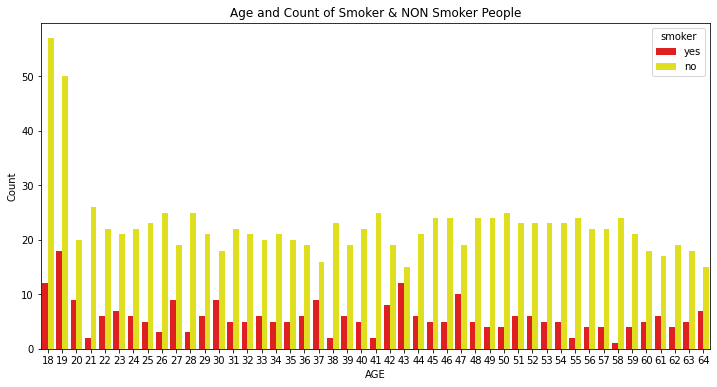

In [11]:
# now lets look at at the age and smoker column in a graph


fig = plt.figure(figsize=(12,6))
sns.countplot(df['age'],hue=df['smoker'],palette=['red','yellow'])
plt.title('Age and Count of Smoker & NON Smoker People')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

# SO it turns out from the graph that smoker person pays more in his/her midical bill than non smoker person

## ok now we have to take care of the str values that we have in the dataset
## we have 3 columns that are objects 


In [12]:
# to keep the orignal dataframe we need to make a copy of it to work at

df_copy = df.copy()
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
# lets switch the object values we have to numeric 
# which is sex, smoker, and region

df_copy['sex'] = df_copy['sex'].map({'female' : 0 , 'male' : 1})


In [14]:
df_copy['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [15]:
df_copy['smoker'] = df_copy['smoker'].map({'yes' : 1 , 'no' : 0 })

In [16]:
df_copy['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [17]:
# what object do we have in region column?

df_copy['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [18]:
df_copy['region'] = df_copy['region'].map({'southeast' : 1 , 'southwest' : 2 , 'northeast' : 3 , 'northwest' : 4})

In [19]:
df_copy['region'].value_counts()

1    364
4    325
2    325
3    324
Name: region, dtype: int64

In [20]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


In [21]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [22]:
# now all of our data is numeric
df_copy.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

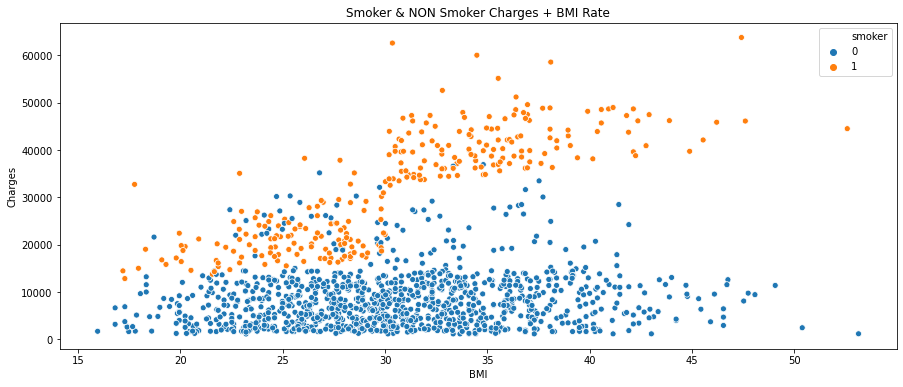

In [23]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df_copy['bmi'],y=df_copy['charges'],hue=df_copy['smoker'])
plt.title('Smoker & NON Smoker Charges + BMI Rate')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

## in this graph too it shows that people who smoke pay more in medical bills and as we can see BMI rate imapct on the bill too

---


## lets test it out

# T - Test

1) Null Hypothesis:

the smoker person pays the same for midical bills as non-smoker

2) Alternative Hypothesis:

the smoker person pays more than non-smoker person

In [48]:
# now lets do some t-test to support the answer that i had 

x = np.array(df[df['smoker'] == 'yes'].charges)
y = np.array(df[df['smoker'] == 'no'].charges)

t_and_pvalue = stats.ttest_ind(x , y , axis=0)
t_and_pvalue

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

# Conclusion: 

## Due to T-test of 46.664 and p_value of ~0, we **reject** the null hypothesis which is that the smoker person pays the same for medical bills as non-smoker, and suggest that the alternative hypothesis is **true** which is that the smoker person pays more than non-smoker person


# CHI^2 Test

In [25]:
# lets test the two columns to see if they are indep
observed = pd.crosstab(df['charges'], df['smoker'])

observed

smoker,no,yes
charges,,
1121.87390,1,0
1131.50660,1,0
1135.94070,1,0
1136.39940,1,0
1137.01100,1,0
...,...,...
55135.40209,0,1
58571.07448,0,1
60021.39897,0,1


In [26]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table \n", expected)

chi2 statistic 1338.0
p value 0.47943654572545824
degrees of freedom 1336
expected frequencies table 
 [[0.79521674 0.20478326]
 [0.79521674 0.20478326]
 [0.79521674 0.20478326]
 ...
 [0.79521674 0.20478326]
 [0.79521674 0.20478326]
 [0.79521674 0.20478326]]


# Conclusion:

Due to a chi^2 statistic of 1338.0 and a p-value of .4794, we **fail to reject** the null hypothesis that smoker and charges are independent.

## another ch^2 test 


In [53]:
observed = pd.crosstab(df['charges'], df['bmi'])

observed.head()

bmi,15.960,16.815,17.195,17.290,17.385,17.400,17.480,17.670,17.765,17.800,17.860,17.955,18.050,18.300,18.335,18.500,18.600,18.715,18.905,19.000,19.095,19.190,19.300,19.475,19.570,19.800,19.855,19.950,20.045,20.100,20.130,20.235,20.300,20.350,20.400,20.425,20.520,20.600,20.615,20.700,...,42.130,42.240,42.350,42.400,42.460,42.655,42.680,42.750,42.900,42.940,43.010,43.120,43.340,43.400,43.700,43.890,44.000,44.220,44.700,44.745,44.770,44.880,45.320,45.430,45.540,45.900,46.090,46.200,46.530,46.700,46.750,47.410,47.520,47.600,47.740,48.070,49.060,50.380,52.580,53.130
charges,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1121.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1131.5066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1135.9407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1136.3994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1137.0110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table \n", expected)

chi2 statistic 731885.9999999999
p value 0.18272996423321278
degrees of freedom 730792
expected frequencies table 
 [[0.00074738 0.00149477 0.00074738 ... 0.00074738 0.00074738 0.00074738]
 [0.00074738 0.00149477 0.00074738 ... 0.00074738 0.00074738 0.00074738]
 [0.00074738 0.00149477 0.00074738 ... 0.00074738 0.00074738 0.00074738]
 ...
 [0.00074738 0.00149477 0.00074738 ... 0.00074738 0.00074738 0.00074738]
 [0.00074738 0.00149477 0.00074738 ... 0.00074738 0.00074738 0.00074738]
 [0.00074738 0.00149477 0.00074738 ... 0.00074738 0.00074738 0.00074738]]


# Conclusion:

Due to a chi^2 statistic of 731885.99 and a p-value of .1827, we **fail to reject** the null hypothesis that bmi and charges are independent.

# PCI

In [27]:
# define a matrix:
data1 = np.array(df_copy)
print(data1.shape)
data1

(1338, 7)


array([[1.90000000e+01, 0.00000000e+00, 2.79000000e+01, ...,
        1.00000000e+00, 2.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 1.00000000e+00, 3.37700000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 1.00000000e+00, 3.30000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 0.00000000e+00, 3.68500000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 0.00000000e+00, 2.58000000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 0.00000000e+00, 2.90700000e+01, ...,
        1.00000000e+00, 4.00000000e+00, 2.91413603e+04]])

In [28]:
# standardize the data
scaler = StandardScaler()
# use the object to fit_transform our data
Z = scaler.fit_transform(data1)

In [29]:
# create the PCA instance
pca = PCA(.9)
# fit on data
pca.fit(Z)
print(pca.components_.shape)
print('Eigenvectors: \n ', pca.components_)
print('Eigenvalues: \n ', pca.explained_variance_)

(6, 7)
Eigenvectors: 
  [[ 0.23954665  0.10605356  0.23221207  0.07063288  0.61404437 -0.14675623
   0.68838268]
 [ 0.1462019   0.02642298  0.66876496 -0.03798334 -0.31013321 -0.6436053
  -0.13721202]
 [ 0.72137588 -0.38259397  0.03546174  0.42533989 -0.26705266  0.27797731
   0.04978588]
 [-0.09123829  0.69885287  0.03801576  0.69701991 -0.08208242  0.06163961
  -0.07390077]
 [-0.47849376 -0.5852242  -0.0300337   0.56983613  0.16228935 -0.27673525
   0.00457047]
 [-0.32374777 -0.10318091  0.69001547 -0.02945865 -0.01091973  0.63676488
   0.04430767]]
Eigenvalues: 
  [1.90256878 1.23546459 1.07418274 1.00668721 0.94012094 0.71283869]


In [30]:
# transform data
B = pca.transform(Z)
print('Projected Data: \n', B)

Projected Data: 
 [[ 0.85348811 -0.89825789 -1.67730703 -1.43416329  1.20844794  0.01894252]
 [-0.92308433  1.26632253 -1.75325749  0.82656405  0.35287379 -0.11608392]
 [-0.50973098  1.1920301  -0.52697244  1.89700964  0.96275565 -0.4726774 ]
 ...
 [-1.08193383  1.58397714 -1.32347084 -1.12984567  1.03529888  0.46302016]
 [-1.56001256 -0.17067192 -0.98621207 -1.16602771  0.74287776 -0.29225778]
 [ 2.0517372  -1.61026994  1.02893729 -1.6654809  -0.71319616  0.35464125]]


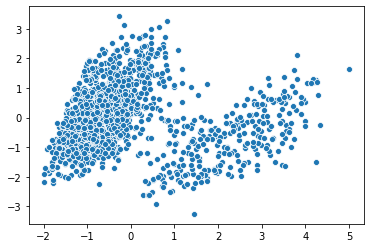

In [31]:
sns.scatterplot(B[:,0], B[:,1])
plt.show()

In [32]:
pca.explained_variance_

array([1.90256878, 1.23546459, 1.07418274, 1.00668721, 0.94012094,
       0.71283869])

In [33]:
# first eigenvalue divided by the total of all of the eigenvalues
# *IS* my explained variance ratio
pca.explained_variance_[0] / pca.explained_variance_.sum()

0.2768636097873283

In [34]:
pca.explained_variance_ratio_

array([0.2715924 , 0.17636303, 0.15333999, 0.14370498, 0.13420261,
       0.10175799])

In [35]:
pca.explained_variance_ratio_.sum()

0.9809610042152848

In [36]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

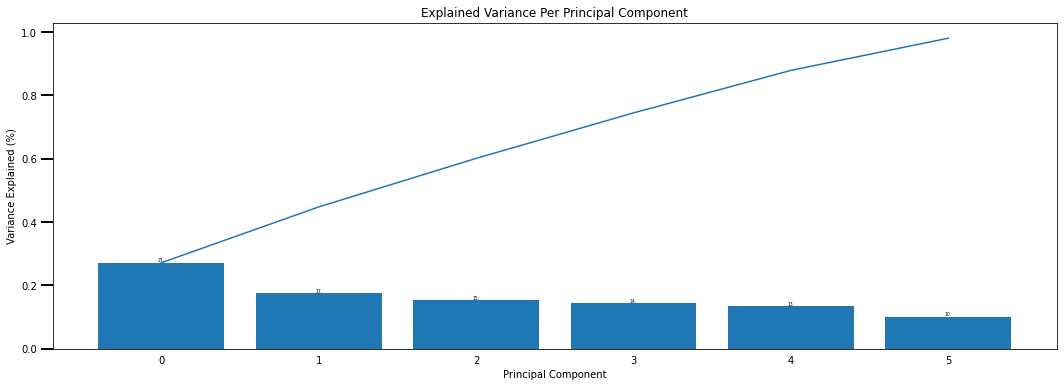

In [37]:
scree_plot(pca)

In [38]:
# lets see the count of smoking people in every area 

df_region = df[['smoker', 'region']]
print(df_region.shape)
df_region.head()


(1338, 2)


,smoker,region
0,yes,southwest
1,no,southeast
2,no,southeast
3,no,northwest
4,no,northwest


In [39]:
df_region.isnull().sum()

smoker    0
region    0
dtype: int64

In [40]:
df_region['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [41]:
df_region['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

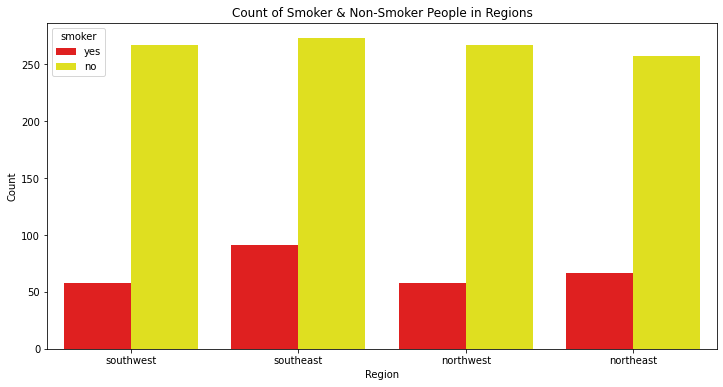

In [42]:
# another graph at the amout of people who smoke in each region


fig = plt.figure(figsize=(12,6))
sns.countplot(df['region'],hue=df['smoker'],palette=['red','yellow'])
plt.title('Count of Smoker & Non-Smoker People in Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()